# Proyecto Programación II – Análisis Exploratorio de Datos (EDA)

El presente proyecto tiene como finalidad aplicar técnicas de análisis exploratorio de datos empleando el conjunto “Video Game Sales with Ratings”, disponible en la plataforma Kaggle. A través de este análisis se busca comprender el comportamiento del mercado de los videojuegos, explorando variables como ventas por región, géneros, plataformas y puntuaciones otorgadas por usuarios y críticos.

Este estudio permite identificar patrones relevantes, detectar posibles inconsistencias en la información y generar una base sólida para futuros análisis o modelos predictivos.

# 1. Carga e inspección inicial de los datos:

En esta sección se realiza la carga del conjunto de datos y una primera exploración de su estructura. Esto incluye identificar el tamaño del dataset, revisar los tipos de variables presentes y obtener un resumen estadístico de las principales columnas. Estos pasos permiten comprender la composición inicial de los datos y detectar posibles inconsistencias o valores atípicos relevantes para el análisis posterior.


In [194]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [195]:
%cd '/content/drive/MyDrive/Colab Notebooks/Proyecto programación 2'

/content/drive/MyDrive/Colab Notebooks/Proyecto programación 2


In [196]:
# Importar librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
# Carga del dataset
import pandas as pd

df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
# Vista general de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [199]:
# Observar el tamaño del dataset
df.shape

(16719, 16)

# 2. Manejo de datos faltantes:

Como primer ejercicio de exploración de datos, se realizará la estandarización de los nombres de las columnas, convirtiéndolos a minúsculas para facilitar su manipulación y mantener una sintaxis consistente a lo largo del análisis.

In [200]:
# Reemplazar los nombres de las columnas (ponerlos en minúsculas) para facilitar la sintaxis en el código
df.columns = df.columns.str.lower()

# Mostrar los nombres de las columnas
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales', 'critic_score',
       'critic_count', 'user_score', 'user_count', 'developer', 'rating'],
      dtype='object')

El siguiente paso consiste en identificar los valores nulos o faltantes presentes en cada columna, con el fin de determinar si es necesario aplicar algún método de imputación o, en su defecto, proceder con la eliminación de filas o columnas afectadas.

In [201]:
# Observar valores nulos
df.isnull().sum()

,0
name,2
platform,0
year_of_release,269
genre,2
publisher,54
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
global_sales,0


In [202]:
# Porcentaje de los datos faltantes
(df.isnull().sum() / len(df)) * 100

,0
name,0.011962
platform,0.000000
year_of_release,1.608948
genre,0.011962
publisher,0.322986
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
global_sales,0.000000


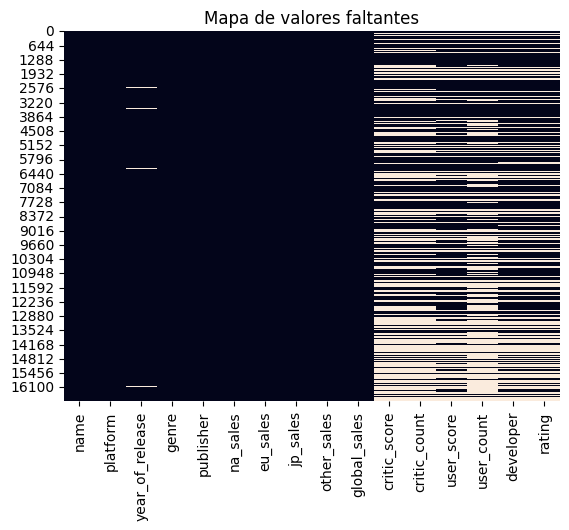

In [203]:
# Vizualiacion de datos faltantes
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.title("Mapa de valores faltantes")
plt.show()

Lo primero a analizar es el comportamiento y la proporción de valores nulos dentro del conjunto de datos. En este caso, se observa que las columnas 'critic_score' y 'critic_count' son las que presentan la mayor cantidad de datos faltantes. Debido a que estos valores no pueden imputarse de manera adecuada (por ejemplo, utilizando la media o la mediana, ya que ello distorsionaría la información original), se decide eliminar las filas que contienen valores nulos en estas columnas. Esta acción permite conservar un conjunto de datos más representativo y confiable para el análisis posterior.

In [204]:
# Elimina las filas que tiene datos faltantes en un variable especifica
df = df.dropna(subset=['critic_score'])
df = df.dropna(subset=['critic_count'])

A continuación, se analiza nuevamente el comportamiento de los valores nulos después de la eliminación de las filas correspondientes, con el fin de verificar si la cantidad de datos faltantes en las columnas afectadas ha disminuido y evaluar el estado general del conjunto de datos.

In [205]:
# Porcentaje de los datos faltantes después de eliminar las variables con NaN de 'critic_score' y 'critic_count'
(df.isnull().sum() / len(df)) * 100

,0
name,0.000000
platform,0.000000
year_of_release,1.892589
genre,0.000000
publisher,0.049158
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
global_sales,0.000000


Después de realizar este proceso, se observa un cambio en el comportamiento de los valores nulos dentro del conjunto de datos. A partir de esta nueva distribución, se procede a evaluar el porcentaje que representan los valores faltantes en cada columna. En términos generales, es adecuado eliminar las filas cuando la proporción de datos nulos es baja (menos del 5% del total), ya que su impacto en el análisis es mínimo y no compromete la representatividad del dataset.

Sin embargo, se identifica que la columna user_count aún presenta más del 5% de valores faltantes. Esta variable no puede ser imputada mediante medidas como la media o la mediana, ya que ello distorsionaría la naturaleza real de los datos. Por este motivo, se decide conservar la columna con sus valores NaN y, en caso de que esta afecte procesos posteriores de filtrado o análisis, se considerará su eliminación para evitar sesgos o interferencias en el desarrollo del proyecto.

In [206]:
# Eliminar los datos faltantes que representan menos del 5% de los datos
df = df.dropna(subset = ['year_of_release', 'publisher', 'user_score', 'developer', 'rating'])

Después de realizar este proceso, se revisa nuevamente el dataset para analizar la información general de los datos y verificar, mediante un mapa de calor, que los cambios se hayan aplicado correctamente. Este paso permite confirmar que cada variable se encuentre libre de valores nulos o, en caso contrario, identificar si aún persisten datos faltantes que requieran un tratamiento adicional.

In [207]:
# Observar valores nulos
df.isnull().sum()

,0
name,0
platform,0
year_of_release,0
genre,0
publisher,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
global_sales,0


In [208]:
# Porcentaje de los datos faltantes
(df.isnull().sum() / len(df)) * 100

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
publisher,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
global_sales,0.000000


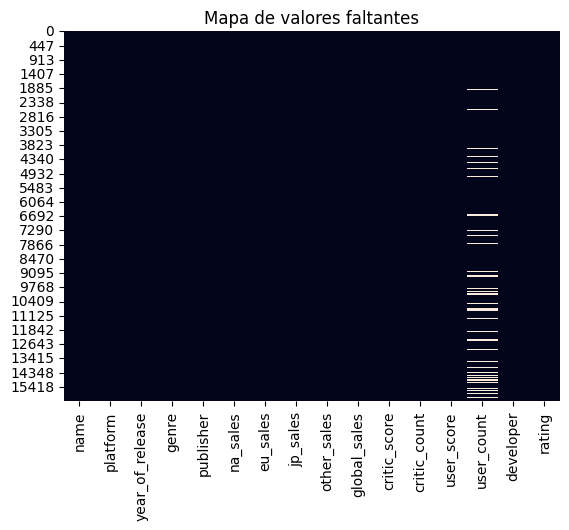

In [209]:
# Vizualiacion de datos faltantes al hacer todo el proceso previo
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.title("Mapa de valores faltantes")
plt.show()

In [210]:
# Revisar el conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7877 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             7877 non-null   object 
 1   platform         7877 non-null   object 
 2   year_of_release  7877 non-null   float64
 3   genre            7877 non-null   object 
 4   publisher        7877 non-null   object 
 5   na_sales         7877 non-null   float64
 6   eu_sales         7877 non-null   float64
 7   jp_sales         7877 non-null   float64
 8   other_sales      7877 non-null   float64
 9   global_sales     7877 non-null   float64
 10  critic_score     7877 non-null   float64
 11  critic_count     7877 non-null   float64
 12  user_score       7877 non-null   object 
 13  user_count       6825 non-null   float64
 14  developer        7877 non-null   object 
 15  rating           7877 non-null   object 
dtypes: float64(9), object(7)
memory usage: 1.0+ MB


In [211]:
df.shape

(7877, 16)

Después de completar el proceso de tratamiento de valores nulos, se observa que el dataset queda conformado por 7.877 registros limpios y mantiene sus 16 variables originales. Esta versión depurada del conjunto de datos permite continuar el análisis con mayor confiabilidad y consistencia.

# 3. Tratamiento de valores inconsistentes en texto y duplicados:

En esta sección se revisará la estructura de las variables textuales para identificar posibles inconsistencias, como diferencias en mayúsculas, errores de escritura o formatos no uniformes. Además, se evaluará si es necesario convertir ciertas variables numéricas de tipo float a entero para representar correctamente su naturaleza. Finalmente, se llevará a cabo la detección y el tratamiento de posibles registros duplicados con el fin de garantizar la integridad y coherencia del dataset.

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7877 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             7877 non-null   object 
 1   platform         7877 non-null   object 
 2   year_of_release  7877 non-null   float64
 3   genre            7877 non-null   object 
 4   publisher        7877 non-null   object 
 5   na_sales         7877 non-null   float64
 6   eu_sales         7877 non-null   float64
 7   jp_sales         7877 non-null   float64
 8   other_sales      7877 non-null   float64
 9   global_sales     7877 non-null   float64
 10  critic_score     7877 non-null   float64
 11  critic_count     7877 non-null   float64
 12  user_score       7877 non-null   object 
 13  user_count       6825 non-null   float64
 14  developer        7877 non-null   object 
 15  rating           7877 non-null   object 
dtypes: float64(9), object(7)
memory usage: 1.0+ MB


In [213]:
df.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


En este punto, al revisar la estructura del dataset, se identifica que las variables 'user_count', 'critic_count' y 'critic_score' se encuentran en formato float. Dado que estas variables representan cantidades enteras como el número de usuarios o críticos que evaluaron un videojuego, o la puntuación asignada por críticos, es necesario convertirlas a tipo entero. Esta conversión permite mejorar la coherencia del dataset y garantiza una representación más precisa de los datos para futuros análisis.

In [214]:
# Pasar a entero la variable 'critic_score' ya que la puntuación agregada recopilada por el equipo de Metacritic es en una escala de 1 a 100 con enteros
df['critic_score'] = df['critic_score'].astype('Int64')

In [215]:
# Convertir las variables 'year_of_release', 'user_count' y 'critic_count' a enteros para mejorar la precisión de la base de datos
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['critic_count'] = df['critic_count'].astype('Int64')
df['user_count'] = df['user_count'].astype('Int64')

In [216]:
df.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89,65,8.5,431,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58,41,6.6,129,Nintendo,E


A continuación, es necesario revisar que los valores presentes en cada variable categórica sean consistentes y estén correctamente estandarizados. Esto incluye verificar que no existan duplicidades causadas por diferencias en mayúsculas, espacios adicionales o variaciones ortográficas, asegurando así que cada categoría sea única y válida dentro del dataset.

In [217]:
# Revisar el conteo de cada valor en cada columna para observar anomalías en el formato de texto
columnas = ['name', 'platform', 'year_of_release', 'genre', 'publisher', 'developer', 'rating']

for columna in columnas:
  print(df[columna].value_counts())


name
Cars                                       8
LEGO Star Wars II: The Original Trilogy    8
Need for Speed: Most Wanted                8
Madden NFL 08                              8
Madden NFL 07                              8
                                          ..
Kinect Adventures!                         1
Wii Fit                                    1
Mario Kart DS                              1
New Super Mario Bros. Wii                  1
Wii Play                                   1
Name: count, Length: 4959, dtype: int64
platform
PS2     1275
X360     887
PS3      798
DS       703
XB       702
PC       654
Wii      565
PSP      455
GC       437
GBA      426
PS4      241
PS       185
3DS      165
XOne     161
PSV      119
WiiU      90
DC        14
Name: count, dtype: int64
year_of_release
2008    708
2007    692
2005    652
2009    644
2002    627
2006    617
2003    582
2004    556
2010    496
2011    485
2001    325
2012    313
2013    267
2014    257
2016    217
2015    

Tras esta revisión completa, también se identificó que la columna user_score se encontraba en formato object, debido a la presencia de valores no numéricos como 'tbd'. Este tipo de dato impide realizar operaciones estadísticas y puede generar errores o resultados inconsistentes durante el análisis. Por este motivo, fue necesario convertir la variable a formato numérico (float), reemplazando los valores 'tbd' por NaN mediante coerción. De esta forma, los datos quedan preparados para su tratamiento adecuado dentro del análisis exploratorio.

In [218]:
# Convertir user_score de object a float (reemplazando 'tbd' por NaN) ---> Código apoyado con IA
df['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce')

In [219]:
# Comprobar duplicados en el dataset
df.duplicated().sum()

np.int64(0)

In [220]:
# Imprimir un df con las filas que están duplicadas
df[df.duplicated(keep = False)]

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating


Dado que no se encontraron filas duplicadas en el dataset, no fue necesario aplicar ningún procedimiento de eliminación o tratamiento adicional en esta etapa.

In [221]:
# Revisión final que cada columna tenga un tipo de dato correcto
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7877 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             7877 non-null   object 
 1   platform         7877 non-null   object 
 2   year_of_release  7877 non-null   Int64  
 3   genre            7877 non-null   object 
 4   publisher        7877 non-null   object 
 5   na_sales         7877 non-null   float64
 6   eu_sales         7877 non-null   float64
 7   jp_sales         7877 non-null   float64
 8   other_sales      7877 non-null   float64
 9   global_sales     7877 non-null   float64
 10  critic_score     7877 non-null   Int64  
 11  critic_count     7877 non-null   Int64  
 12  user_score       6825 non-null   float64
 13  user_count       6825 non-null   Int64  
 14  developer        7877 non-null   object 
 15  rating           7877 non-null   object 
dtypes: Int64(4), float64(6), object(6)
memory usage: 1.1+ MB


Tras reemplazar el valor 'tbd' por NaN, la cantidad de valores ausentes en la columna user_score se modificó. Dado que estos valores faltantes no afectan el análisis inmediato, se decidió conservarlos temporalmente. Más adelante, según los requerimientos del análisis y el comportamiento de la variable, se evaluará si es necesario imputarlos o eliminar las filas asociadas para garantizar la consistencia del dataset.

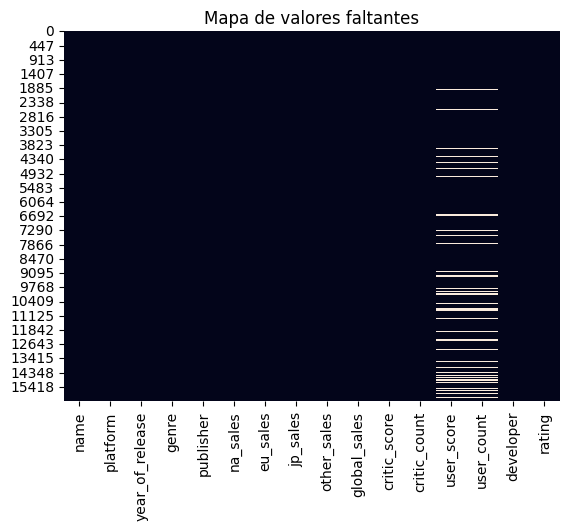

In [222]:
# Vizualiacion de datos faltantes al hacer todo el proceso previo
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.title("Mapa de valores faltantes")
plt.show()

Tras eliminar filas con valores nulos, el índice del dataset quedó desordenado, por lo que se realizó un reinicio del índice para mantener la estructura limpia y consecutiva.


In [223]:
df = df.reset_index(drop = True)

# 4. Identificación de outliers:

En esta sección se realizará la detección de valores atípicos en las variables relevantes del dataset. Este proceso permite identificar datos que se alejan significativamente del comportamiento general y que podrían influir de manera negativa en el análisis o en modelos posteriores.

En este análisis, la identificación de valores atípicos se enfocará exclusivamente en las variables numéricas relacionadas con las ventas. Esto se debe a que estas variables pueden presentar valores extremos que distorsionen la distribución, afecten las medidas estadísticas o influyan negativamente en la interpretación del comportamiento del mercado.

Por el contrario, variables como 'user_count', 'critic_count', 'user_score' y similares representan cantidades reales derivadas del proceso de recolección de datos. En estos casos, valores elevados no corresponden a errores ni a anomalías, sino a la cantidad auténtica de usuarios o críticos que evaluaron cada videojuego, por lo que no es apropiado considerarlos como outliers ni aplicar técnicas de tratamiento sobre ellos.

Por esta razón, el análisis de outliers se limita únicamente a las columnas de ventas, evitando intervenir en variables cuyo comportamiento refleja información legítima del dataset.

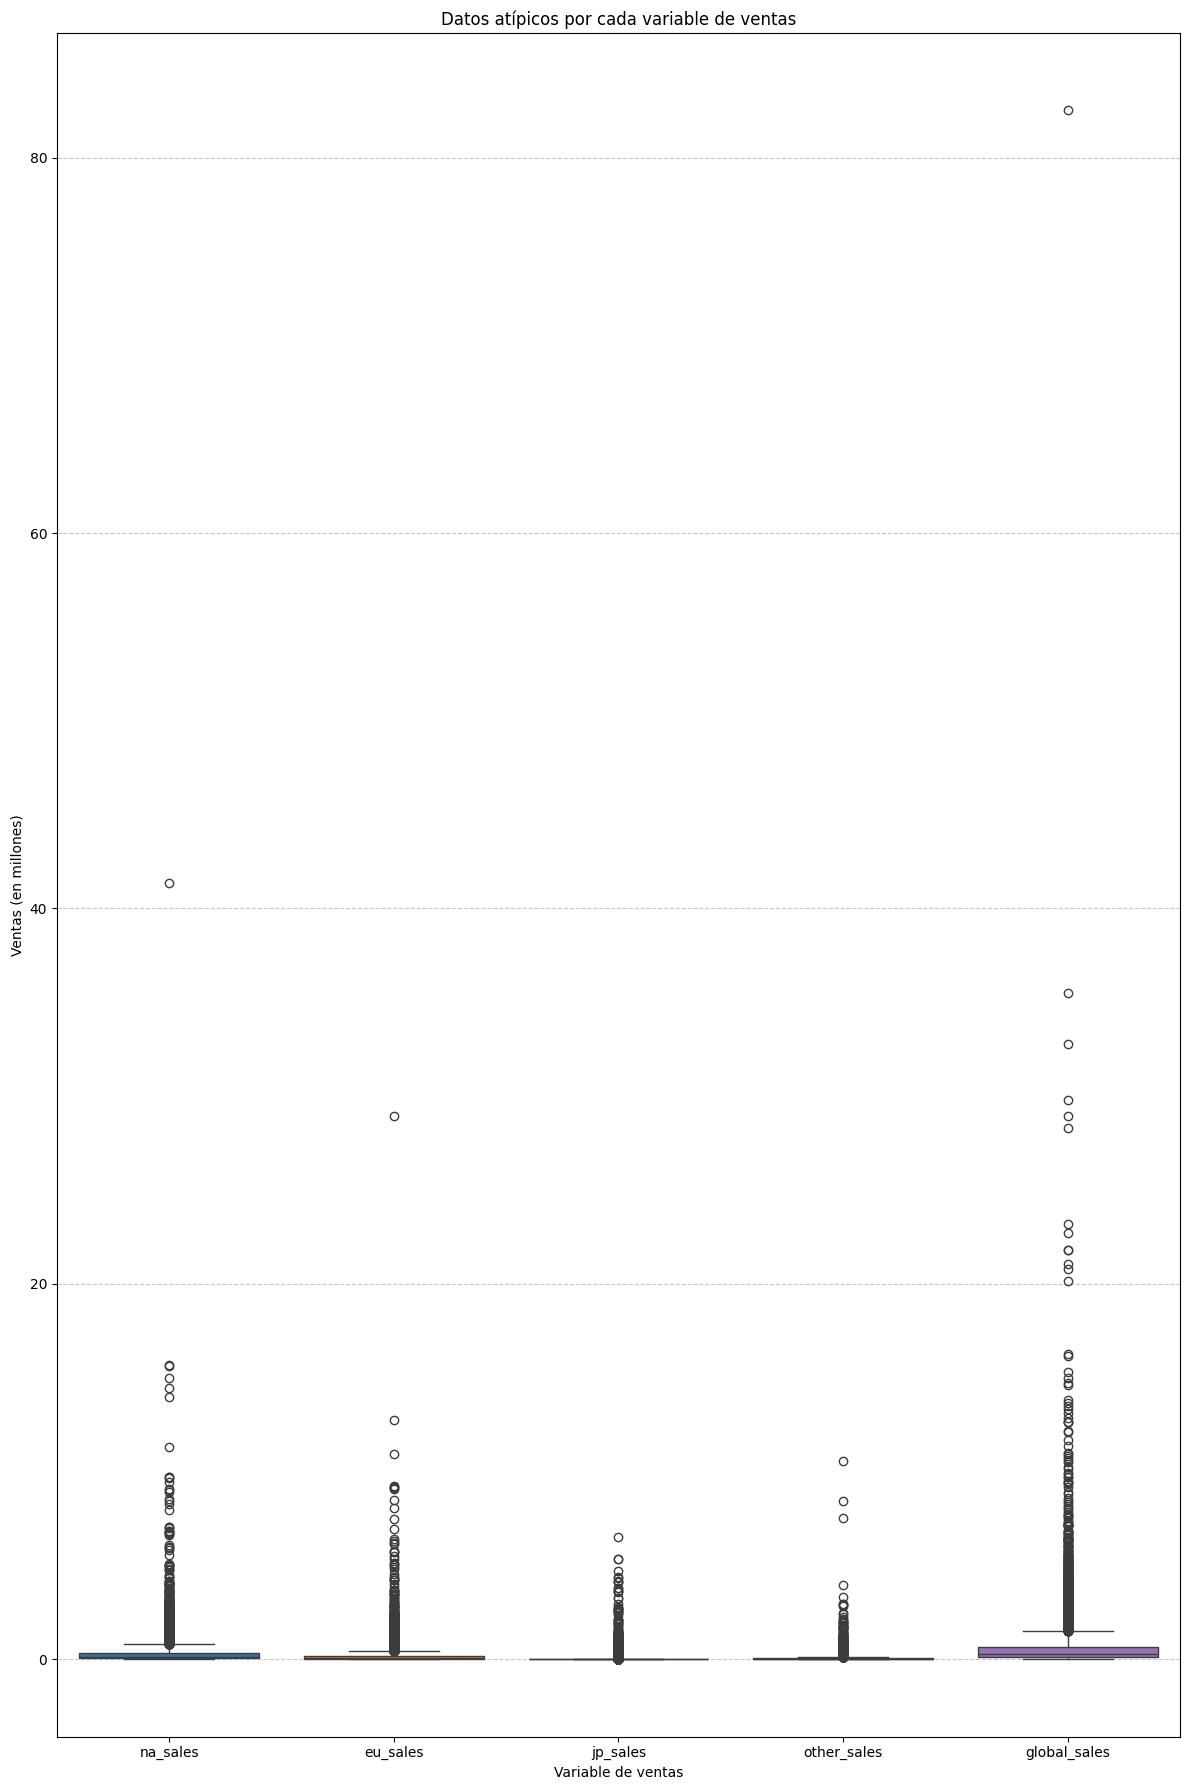

In [224]:
# Crear el diagrama de caja para identificar valores atipicos sólo en las ventas
columnas_num = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']
boxplot_data = df[columnas_num]
plt.figure(figsize = (12, 18))
sns.boxplot(data = boxplot_data, showfliers  = True)

# Añadir títilos y estilo
plt.title('Datos atípicos por cada variable de ventas')
plt.xlabel('Variable de ventas')
plt.ylabel('Ventas (en millones)')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

Al analizar los valores atípicos presentes en las variables de ventas, es importante considerar que la eliminación de un dato extremo solo es justificable cuando se trata de un error de medición o de construcción del dataset. Si el valor atípico corresponde a un dato real, su eliminación podría introducir sesgos, reducir el tamaño de la muestra y alterar la distribución y la variabilidad de los datos.

La presencia de valores extremos forma parte natural del comportamiento del mercado, especialmente en la industria de los videojuegos, donde algunos títulos alcanzan niveles de ventas significativamente superiores al promedio. Por esta razón, en este caso no es apropiado eliminar ni modificar estos valores, ya que representan información válida y relevante para el análisis. En consecuencia, no se realizará un tratamiento específico de outliers en las variables de ventas.

# 5. Creación de variables:

Con el fin de enriquecer el análisis y obtener información más representativa a partir de las variables del dataset original, se generaron dos nuevas variables derivadas de las columnas numéricas existentes.

La primera variable a crear sería: 'critic_user_gap'

La primera variable creada fue critic_user_gap, que mide la diferencia entre la puntuación de críticos y la de usuarios. Para ello, se normalizó previamente user_score a una escala de 0 a 100, permitiendo compararla directamente con critic_score. Esta variable ayuda a identificar juegos donde existe una discrepancia notable entre ambas valoraciones.

In [225]:
df['user_score_normalized'] = df['user_score'] * 10

# Crear diferencia entre críticos y usuarios
df['critic_user_gap'] = df['critic_score'] - df['user_score_normalized']

La siguiente variable a crear es: 'score_efficiency'

Mide cuántas ventas globales obtiene un juego por cada punto de crítica, esta variable sirve para ver si un buen puntaje realmente se traduce en ventas.

In [226]:
df['score_efficiency'] = df['global_sales'] / df['critic_score']
df['score_efficiency']

,score_efficiency
0,1.085921
1,0.433171
2,0.409625
3,0.334831
4,0.498621
...,...
7872,0.000149
7873,0.000164
7874,0.000189
7875,0.000208


Por ejempo un valor como 1.08 significa:

Por cada punto de puntuación crítica, el juego generó 1.08 millones de ventas globales, lo cual es bastante alto.

Los valores obtenidos para la variable score_efficiency muestran una amplia variación. Los juegos con valores altos (≈1.0 a 0.3) presentan una eficiencia elevada, indicando que generaron un volumen de ventas considerable por cada punto de puntuación crítica. En contraste, los valores bajos (≈0.001 o menores) corresponden a títulos con ventas globales muy reducidas en relación con su valoración por parte de la crítica. Esta métrica permite identificar qué juegos lograron un éxito comercial mayor o menor del esperado según su calidad percibida.

# 6. Filtrado y condiciones en Pandas:



In [236]:
# Genero que mas vendio globalmente
genero_mas_vendido = df.groupby("genre")["global_sales"].sum().sort_values(ascending = False)
genero_mas_vendido

,global_sales
genre,
Action,1243.11
Sports,873.13
Shooter,820.67
Role-Playing,502.58
Racing,498.11
Misc,449.94
Platform,394.40
Fighting,254.02
Simulation,212.58


Al filtrar los datos por genero y analizar las ventas globales nos damos cuenta que el genero de acción es el más vendido, esto nos indica que los juegos de accion dominan el mercado de los videojuegos esto se debe a su amplia variedad de titulos populares y su capacidad de atraer a un gran número de jugadores globalmente.

In [237]:
# Plataforma que mas vendio globalmente
platform_sales = df.groupby("platform")["global_sales"].sum().sort_values(ascending=False)
platform_sales


,global_sales
platform,
PS2,981.46
X360,858.67
PS3,788.81
Wii,682.23
DS,434.24
PS4,243.08
XB,227.09
PS,217.58
PSP,196.86


Al filtrar y analizar los datos de plataforma junto con el numero de ventas observamos que la PS2 es la plataforma que mas vendio globalmente, esto puede explicarse por su enome exito que tuvo en su epoca y la cantidad de titulos reconocidos disponibles

In [238]:
# Juegos con mayor puntuación segun la crítica
puntuacion_de_criticos = df.groupby("name")["critic_score"].max().sort_values(ascending=False)
puntuacion_de_criticos.head(10)

,critic_score
name,
Grand Theft Auto IV,98
SoulCalibur,98
Tony Hawk's Pro Skater 2,98
Halo: Combat Evolved,97
NFL 2K1,97
Grand Theft Auto III,97
Grand Theft Auto V,97
Metroid Prime,97
Tony Hawk's Pro Skater 3,97


En este caso analizamos la puntuación otorgada por los críticos a los videojuegos y encontramos que Grand Theft Auto IV es el video juego con la calificación más alta, este resultado nos muestra que fue un titulo que influllo en el mercado

In [239]:
#Cantidad de usuarios que dieron una puntuacion
puntuacion_de_usuarios = df.groupby("name")["user_count"].sum().sort_values(ascending=False)
puntuacion_de_usuarios.head(10)

,user_count
name,
The Witcher 3: Wild Hunt,24807
Call of Duty: Modern Warfare 3,20053
The Elder Scrolls V: Skyrim,15189
Grand Theft Auto V,15124
Fallout 4,13489
Mass Effect 3,11500
Call of Duty: Modern Warfare 2,11201
BioShock Infinite,10832
Diablo III,10570


Al sumar la cantidad de usuarios que dieron una puntuación a cada videojuego se identifica que ciertos títulos son preferidos por los usuarios los juegos que aparecen en las primeras posiciones  cuentan con la mayor cantidad de usuarios que le dieron una valoración lo que indica un alto nivel de popularidad estos resultados nos muestra qué títulos generaron mayor interés.

In [240]:
#Total de ventas por año
ventas_por_año = df.groupby("year_of_release")["global_sales"].sum().sort_values(ascending=False)
ventas_por_año.head(10)


,global_sales
year_of_release,
2008,513.57
2009,483.10
2007,477.64
2010,430.46
2006,428.26
2011,391.57
2005,350.56
2004,337.45
2002,310.63


Al sumar las ventas por año se observa que entre 2007 y 2009 se alcanzaron los picos más altos mostrandonos que las consolas ps3, wii, xbox 360 fueron las mas exitosas

# 7. Agrupación con groupby:

Analicemos los videojuegos y su distribución. Primero, veamos cuántos videojuegos se lanzaron en cada año.

In [252]:
# Calcular cuántos videojuegos se lanzaron en cada año
juegos_por_año = df.groupby(['year_of_release'])['name'].count().reset_index(name = 'Juegos_por_año').sort_values('Juegos_por_año', ascending = False).reset_index()
juegos_por_año

,index,year_of_release,Juegos_por_año
0,16,2008,708
1,15,2007,692
2,13,2005,652
3,17,2009,644
4,10,2002,627
5,14,2006,617
6,11,2003,582
7,12,2004,556
8,18,2010,496
9,19,2011,485


El período comprendido entre 2005 y 2010 muestra la mayor actividad en la industria de videojuegos dentro del dataset. Los años 2007, 2008 y 2009 destacan especialmente, alcanzando los valores más altos de lanzamientos, con un pico en 2008 (708 juegos).

Esto indica que esos años representaron una etapa de alta producción y crecimiento en el sector, posiblemente influenciada por la consolidación de consolas como Xbox 360, PlayStation 3 y Nintendo Wii, además del auge de desarrolladores y publishers durante esa generación.

In [242]:
# Promedio de ventas por género
ventas_genero = df.groupby("genre")["global_sales"].mean().sort_values(ascending = False)
ventas_genero

,global_sales
genre,
Shooter,0.893003
Misc,0.892738
Platform,0.806544
Sports,0.760566
Racing,0.698612
Role-Playing,0.690357
Action,0.678553
Fighting,0.630323
Simulation,0.621579


Los géneros Shooter, Misc y Platform encabezan la lista, con promedios cercanos o superiores a 0.80 millones de copias vendidas, lo que indica una alta demanda y presencia de títulos exitosos dentro de estas categorías.

In [244]:
# Cantidad de juegos vendidos por genero
cantidad_juegos_genero = df.groupby("genre")["name"].count().sort_values(ascending = False)
cantidad_juegos_genero

,name
genre,
Action,1832
Sports,1148
Shooter,919
Role-Playing,728
Racing,713
Misc,504
Platform,489
Fighting,403
Simulation,342


De acuerdo con el análisis, el género Action es el más producido en la industria, con 1832 juegos, muy por encima del resto. Le siguen Sports (1148) y Shooter (919), lo que refleja que estos géneros son los más populares entre desarrolladores y consumidores, y representan los mercados más amplios y competitivos.

En contraste, géneros como Puzzle (216), Strategy (284) y Adventure (299) muestran una producción considerablemente menor.

In [246]:
# Promedio de ventas por plataforma
ventas_plataforma = df.groupby("platform")["global_sales"].mean().sort_values(ascending = False)
ventas_plataforma

,global_sales
platform,
Wii,1.207487
PS,1.176108
PS4,1.008631
PS3,0.988484
X360,0.968061
XOne,0.805714
PS2,0.769773
3DS,0.752424
WiiU,0.736222


Las plataformas con mayor promedio de ventas globales son Wii, PS, PS4, PS3 y Xbox 360, destacándose Wii con el valor más alto (≈1.21 millones por juego). Esto indica que estas plataformas han tenido una combinación favorable de alto número de jugadores, fuerte adopción en el mercado y títulos exitosos con buen rendimiento comercial.
En contraste, plataformas como PSV, PC, XB, DC y GBA presentan los promedios más bajos, lo que sugiere un menor impacto comercial por título, ya sea por menor base de usuarios, menor volumen de lanzamientos exitosos o mercados más segmentados.

In [248]:
# Promedio de ventas por clasificación ESRB (rating)
ventas_rating = df.groupby("rating")["global_sales"].mean().sort_values(ascending=False)
ventas_rating

,global_sales
rating,
AO,1.950000
K-A,1.920000
M,0.980789
E,0.767217
T,0.544173
E10+,0.519471
RP,0.030000


El análisis muestra diferencias importantes en el desempeño comercial según la clasificación ESRB. Las categorías AO (Adults Only) y K-A (Kids to Adults) presentan los promedios de ventas más altos; sin embargo, ambas clasificaciones tienen muy pocos títulos en el dataset, por lo que sus valores pueden estar inflados por casos aislados y no representan una tendencia del mercado.
En contraste, las clasificaciones con mayor volumen de juegos como M (Mature), E (Everyone) y T (Teen) muestran promedios más consistentes, destacándose la categoría M, que registra las ventas promedio más altas entre las clasificaciones comunes, seguida por E y T.
Finalmente, la clasificación RP (Rating Pending) presenta el valor más bajo, lo cual es esperado, ya que estos juegos suelen encontrarse en etapas previas al lanzamiento o no llegar a distribución masiva.

# Visualizaciones:

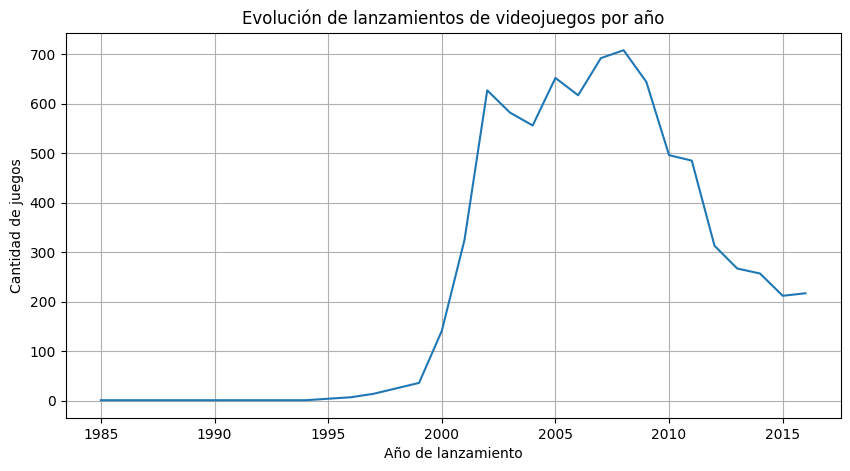

In [253]:
# ¿Cómo ha cambiado la cantidad de lanzamientos a lo largo del tiempo?
lanzamientos_por_año = df.groupby('year_of_release')['name'].count()

plt.figure(figsize=(10,5))
plt.plot(lanzamientos_por_año.index, lanzamientos_por_año.values)
plt.xlabel("Año de lanzamiento")
plt.ylabel("Cantidad de juegos")
plt.title("Evolución de lanzamientos de videojuegos por año")
plt.grid(True)
plt.show()

La cantidad de videojuegos lanzados aumentó significativamente hasta alcanzar su punto máximo entre 2005 y 2009, indicando un periodo de alta producción en la industria. Después de 2010 se observa una tendencia descendente, posiblemente asociada a cambios en el mercado, costos de desarrollo y transición hacia nuevas plataformas.

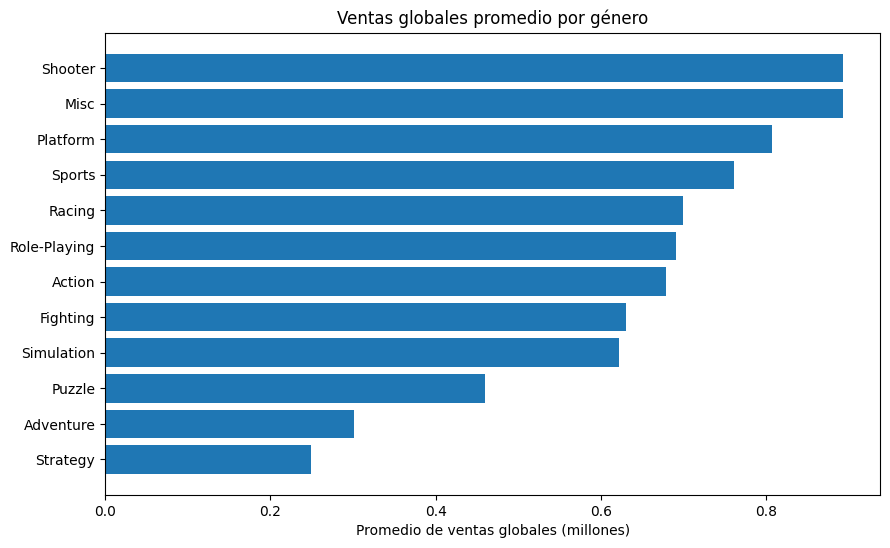

In [255]:
# Ventas globales promedio por género
# Comparar géneros según su desempeño en ventas.
ventas_genero = df.groupby("genre")["global_sales"].mean().sort_values()

plt.figure(figsize=(10,6))
plt.barh(ventas_genero.index, ventas_genero.values)
plt.xlabel("Promedio de ventas globales (millones)")
plt.title("Ventas globales promedio por género")
plt.show()

Los géneros Shooter, Misc y Platform lideran en ventas promedio, mientras que Puzzle, Adventure y Strategy presentan un mercado más reducido. Esto sugiere diferencias claras en popularidad y tamaño del público según el tipo de juego.

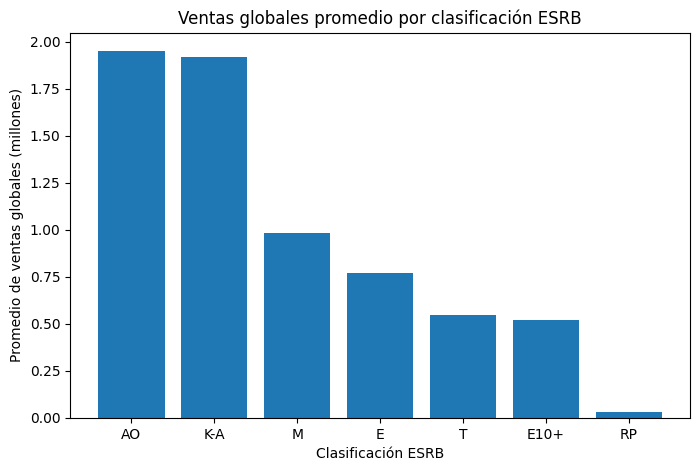

In [257]:
# Ventas globales promedio por clasificación ESRB
# Comparar el desempeño de los juegos según su clasificación de edad

ventas_rating = df.groupby("rating")["global_sales"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
plt.bar(ventas_rating.index, ventas_rating.values)
plt.xlabel("Clasificación ESRB")
plt.ylabel("Promedio de ventas globales (millones)")
plt.title("Ventas globales promedio por clasificación ESRB")
plt.show()


Las clasificaciones AO y K-A presentan los promedios más altos, aunque esto se debe a que tienen muy pocos juegos en el dataset. Entre categorías con mayor representación, destacan M, seguida de E y T, lo que indica que los juegos para adultos y para todo público tienden a generar un mayor volumen de ventas.

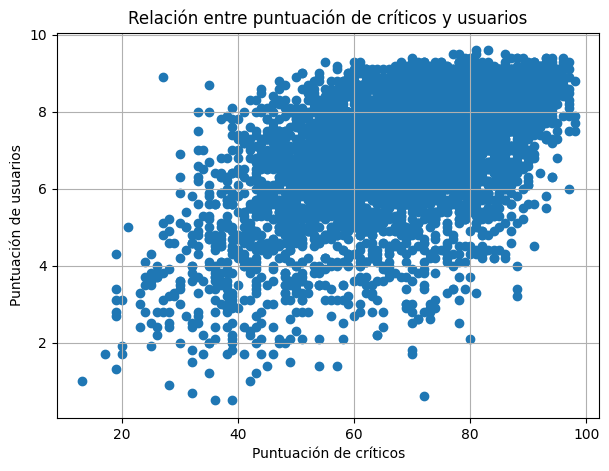

In [258]:
# Correlación entre critic_score y user_score
# Identificar si existe relación entre las puntuaciones de críticos y usuarios

df_plot = df.dropna(subset=["critic_score", "user_score"])

plt.figure(figsize=(7,5))
plt.scatter(df_plot["critic_score"], df_plot["user_score"])
plt.xlabel("Puntuación de críticos")
plt.ylabel("Puntuación de usuarios")
plt.title("Relación entre puntuación de críticos y usuarios")
plt.grid(True)
plt.show()


Existe una correlación positiva moderada entre ambas puntuaciones, lo que indica que en general los usuarios tienden a valorar mejor los juegos bien recibidos por los críticos, aunque también se observan casos de discrepancias significativas.